In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Historical_Banking_Data.csv', low_memory=False)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [3]:
print("The number of rows are {} and the number of columns are {}".format(df.shape[0],df.shape[1]))

The number of rows are 100000 and the number of columns are 28


#Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [6]:
# finding the key statistical values of the categorical columns
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [7]:
df.Month.value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [8]:
df_without_na = df.dropna().copy()

# finding the unique values for each column
for i in df_without_na:
  print('\n', i, df_without_na[i].unique())


 ID ['0x1602' '0x1608' '0x160e' ... '0x25fea' '0x25feb' '0x25fed']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Month ['January' 'July' 'February' 'March' 'May' 'June' 'August' 'April']

 Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age ['23' '28_' '28' ... '8425' '2263' '1342']

 SSN ['821-00-0265' '004-07-5839' '486-85-3974' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer'
 'Accountant' 'Architect' 'Musician' 'Developer']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]

 Num_Bank_Accounts [   3    2    1    0    8    5    6    7    9   10    4   67  528 1647
 1696  649 

#Data Preprocessing

In [9]:
def preprocess_data(data, mvi_groupby=None, mvi_customval=None, column=None, unwanted_value_replace=None, unwanted_value_strip=None, datatype=None):

  # stripping unwanted values that might be at the beginning or end of the value
  if unwanted_value_strip is not None:
    if data[column].dtype == object:
      data[column] = data[column].str.strip(unwanted_value_strip)
      print(f"\nTrailing & leading {unwanted_value_strip} are removed")

  # replacing unwanted value with NaN
  if unwanted_value_replace is not None:
    data[column] = data[column].replace(unwanted_value_replace, np.nan)
    print(f"\nUnwanted value {unwanted_value_replace} is replaced with NaN")

  # performing missing value imputation (mvi) using mode after grouping data using the column specified by the user
  if mvi_groupby and column:
    data[column] = data[column].replace('', np.nan)
    group_mode = data.groupby(mvi_groupby)[column].transform(lambda x: x.mode().iat[0])
    data[column] = data[column].fillna(group_mode)
    print("\nMissing values imputed with group mode")

  # performing missing value imputation using a user provided custom value
  if mvi_customval is not None:
    data[column] = data[column].replace('', np.nan)
    data[column].replace([np.NaN], mvi_customval, inplace=True)
    print(f"\nMissing values are replaced with '{mvi_customval}'")

  # changing the data type of the column based on user provided data type
  if datatype is not None:
    data[column] = data[column].astype(datatype)
    print(f"\nDatatype of {column} is changed to {datatype}")

print('----------------------------------------------------')
print("Column: Name")
preprocess_data(data = df,
column = 'Name',
mvi_groupby = 'Customer_ID')

print("Column: Type_of_Loan")
preprocess_data(data = df,
column = 'Type_of_Loan',
mvi_customval = 'Not Specified')
print("Column: SSN")
preprocess_data(data = df,
column = 'SSN',
unwanted_value_replace = '#F%$D@*&8',
mvi_groupby = 'Customer_ID')
print("Column: Occupation")
preprocess_data(data = df,
column = 'Occupation',
unwanted_value_replace = '_______',
mvi_groupby = 'Customer_ID',)

print("Column: Credit_Mix")
preprocess_data(data = df,
column = 'Credit_Mix',
unwanted_value_replace = '_',
mvi_groupby = 'Customer_ID')

print("Column: Monthly_Inhand_Salary")
preprocess_data(data = df,
column = 'Monthly_Inhand_Salary',
mvi_groupby = 'Customer_ID')

print("Column: Num_Credit_Inquiries")
preprocess_data(data = df,
column = 'Num_Credit_Inquiries',
mvi_groupby = 'Customer_ID')

print("Column: Payment_Behaviour")
preprocess_data(data = df,
column = 'Payment_Behaviour',
unwanted_value_replace = '!@9#%8',
mvi_groupby = 'Customer_ID')
print("Column: Age")
preprocess_data(data = df,
column = 'Age',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'int')

print("Column: Annual_Income")
preprocess_data(data = df,
column = 'Annual_Income',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Outstanding_Debt")
preprocess_data(data = df,
column = 'Outstanding_Debt',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Amount_invested_monthly")
preprocess_data(data = df,
column = 'Amount_invested_monthly',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Num_of_Loan")
preprocess_data(data = df,
column = 'Num_of_Loan',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'int')

print("Column: Num_of_Delayed_Payment")
preprocess_data(data = df,
column = 'Num_of_Delayed_Payment',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Changed_Credit_Limit")
preprocess_data(data = df,
column = 'Changed_Credit_Limit',
unwanted_value_strip = '_',
unwanted_value_replace = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')
print("Column: Monthly_Balance")
preprocess_data(data = df,
column = 'Monthly_Balance',
unwanted_value_strip = '_',
unwanted_value_replace = '__-333333333333333333333333333__',
mvi_groupby = 'Customer_ID',
datatype = 'float')

----------------------------------------------------
Column: Name

Missing values imputed with group mode
Column: Type_of_Loan

Missing values are replaced with 'Not Specified'
Column: SSN

Unwanted value #F%$D@*&8 is replaced with NaN

Missing values imputed with group mode
Column: Occupation

Unwanted value _______ is replaced with NaN

Missing values imputed with group mode
Column: Credit_Mix

Unwanted value _ is replaced with NaN

Missing values imputed with group mode
Column: Monthly_Inhand_Salary

Missing values imputed with group mode
Column: Num_Credit_Inquiries

Missing values imputed with group mode
Column: Payment_Behaviour

Unwanted value !@9#%8 is replaced with NaN

Missing values imputed with group mode
Column: Age

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Age is changed to int
Column: Annual_Income

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Annual_Income is changed to float
Column: O

In [10]:
# creating a function that picks the year and month and then combines them to give total number of months
def credit_history_in_months(val):
  if pd.notnull(val):
    years = int(val.split(' ')[0])
    month = int(val.split(' ')[3])
    return (years*12)+month
  else:
    return val

# applying the function to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: credit_history_in_months(x)).astype(float)

print('Column: Credit_History_Age')
preprocess_data(data = df,
column = 'Credit_History_Age',
mvi_groupby = 'Customer_ID')

Column: Credit_History_Age

Missing values imputed with group mode


In [11]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

#Outlier capping



In [12]:
def outlier_capping(data, threshold=1.5):

  # making a copy of the input DataFrame
  data_copy = data.copy()

  # creating a empty list to save the outlier indices
  outlier_indices = []

  # calculating quartile 1 and 3 for every numerical column in the data
  for column in data_copy.columns:
    if pd.api.types.is_numeric_dtype(data_copy[column]):

      # calculating quartiles
      Q1 = data_copy[column].quantile(0.25)
      Q3 = data_copy[column].quantile(0.75)

      # calculating inter-quartile range
      IQR = Q3 - Q1

      # defining the upper and lower outlier bounds
      lower_bound = Q1 - threshold * IQR
      upper_bound = Q3 + threshold * IQR

      # identifying outliers
      outliers = data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)]
      outlier_indices.extend(outliers.index)

      # capping outliers
      data_copy[column] = np.where(data_copy[column] < lower_bound, lower_bound, data_copy[column])
      data_copy[column] = np.where(data_copy[column] > upper_bound, upper_bound, data_copy[column])

      # removing duplicates from outlier_indices list
      outlier_indices = list(set(outlier_indices))

  # returning the dataframe with capped outliers
  return data_copy, outlier_indices

# running the function to cap all the outliers in the data
df_clean, outliers = outlier_capping(df)

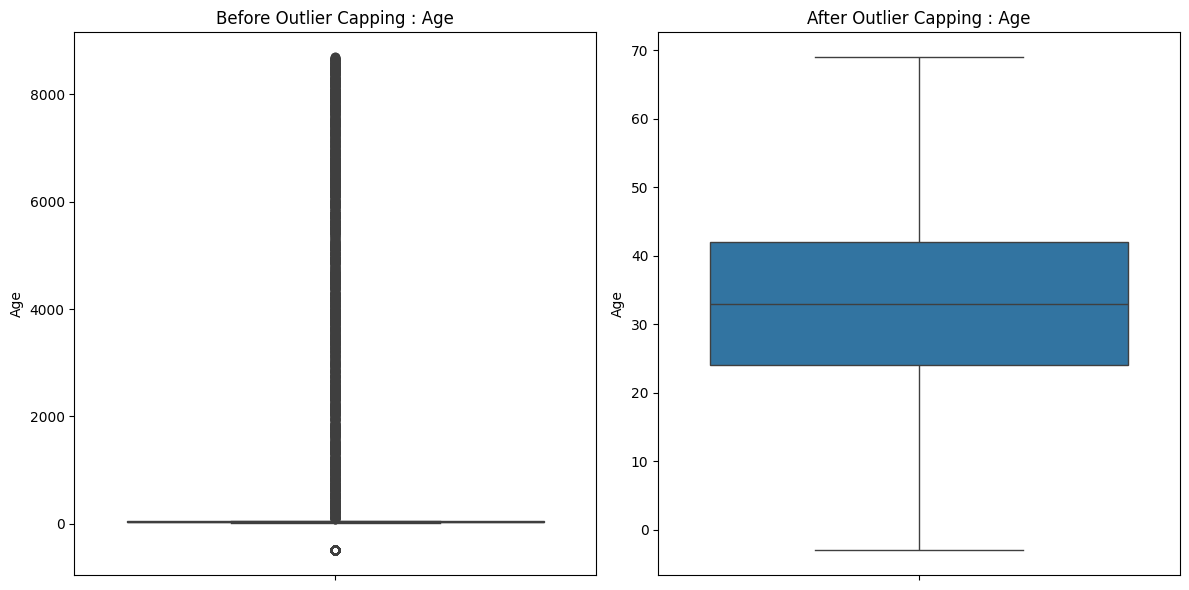

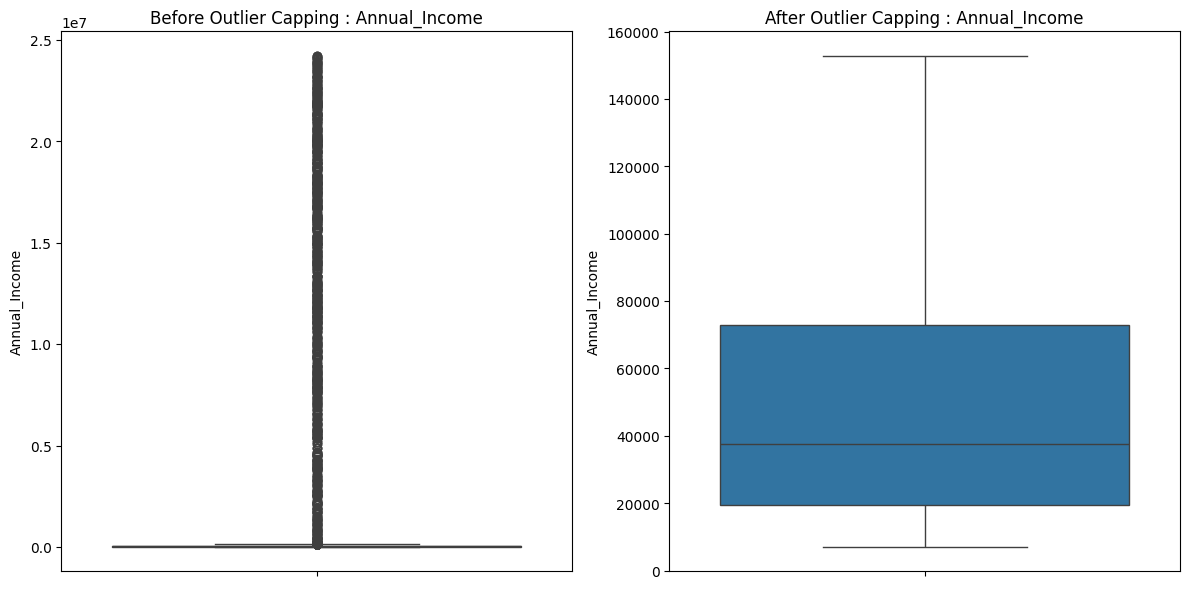

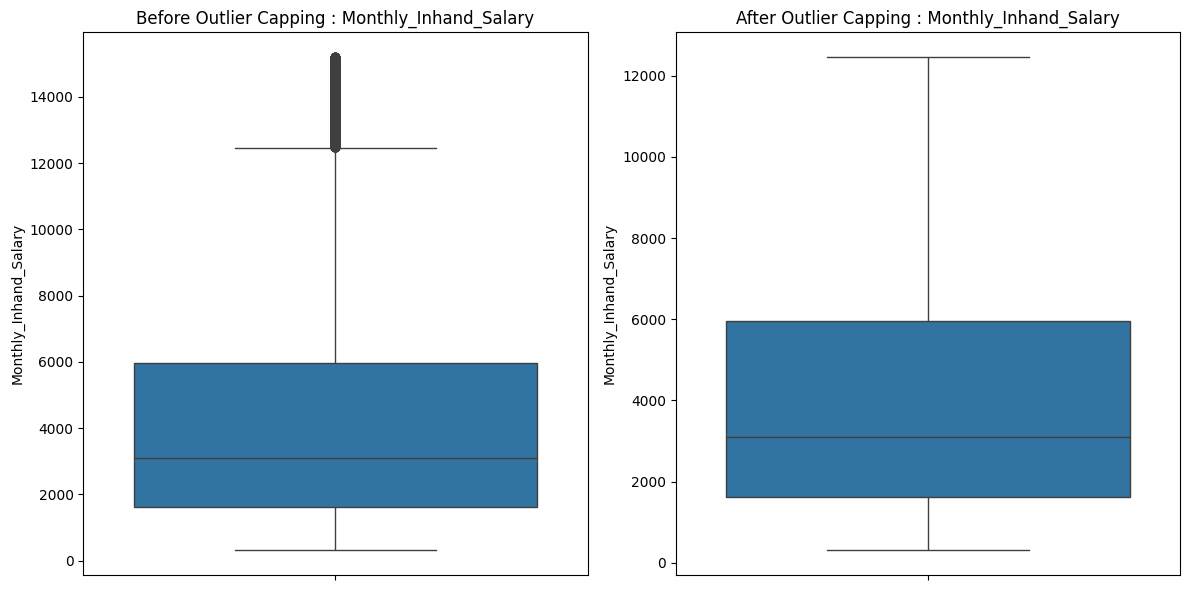

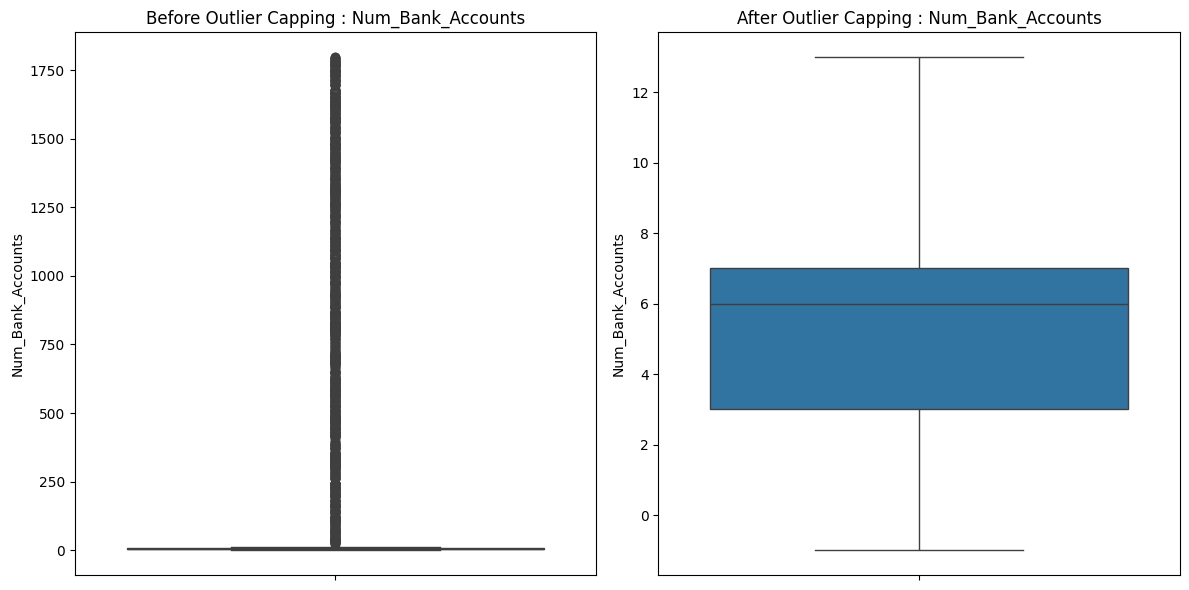

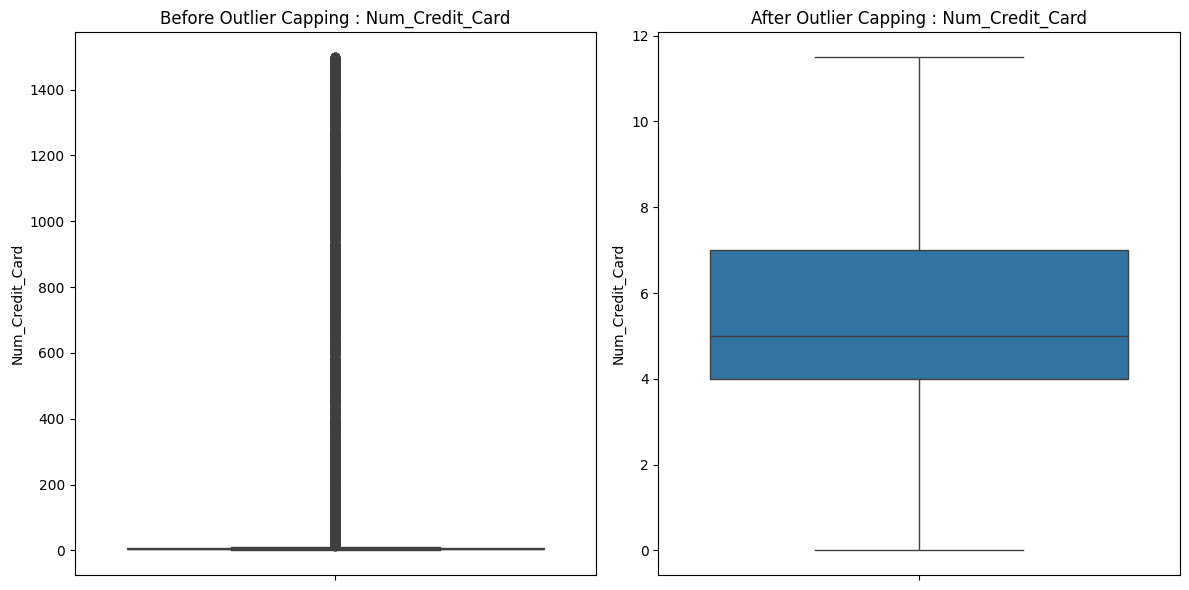

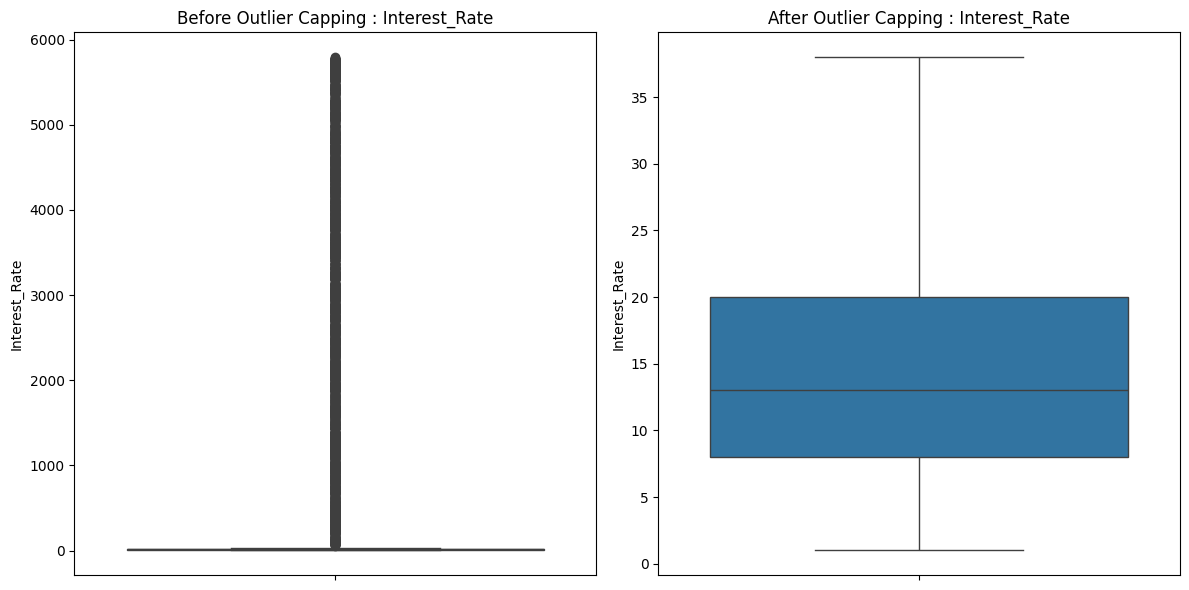

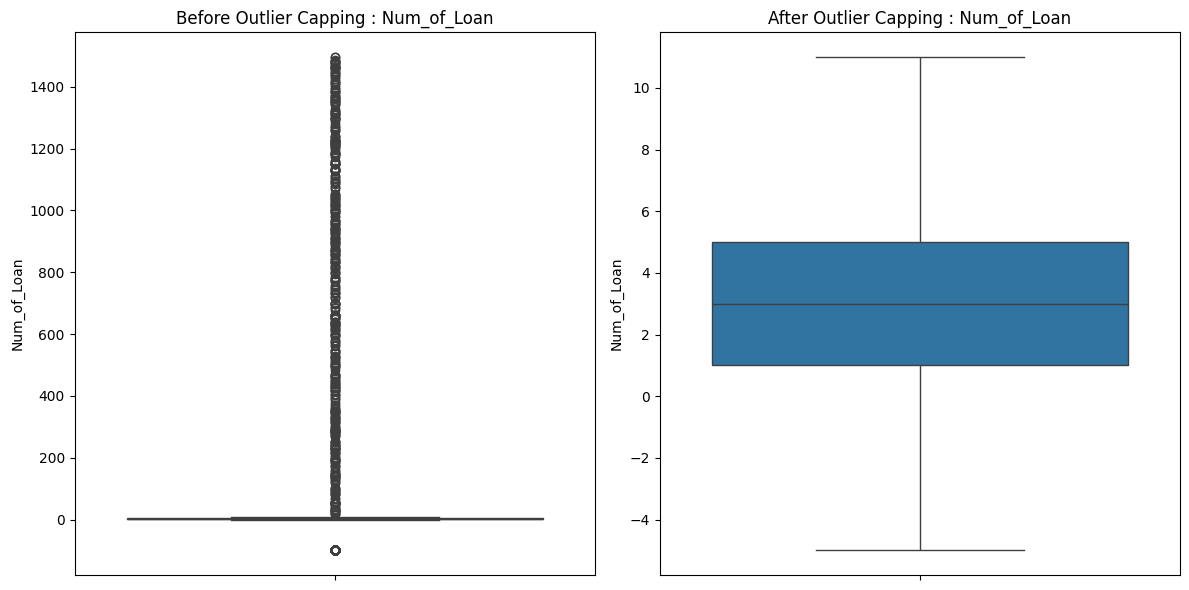

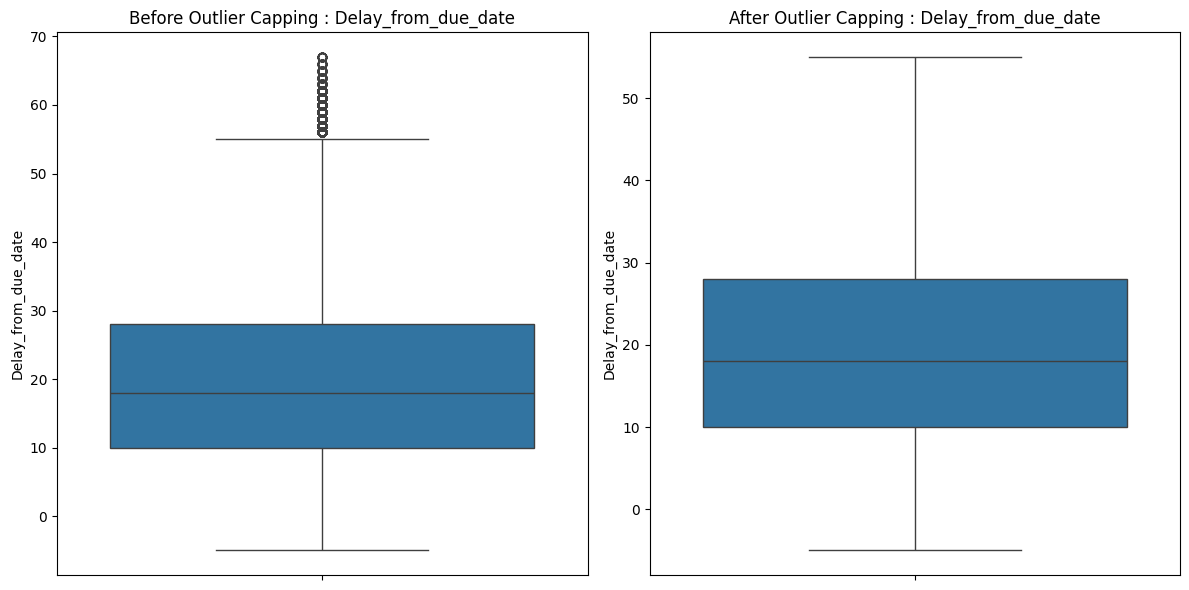

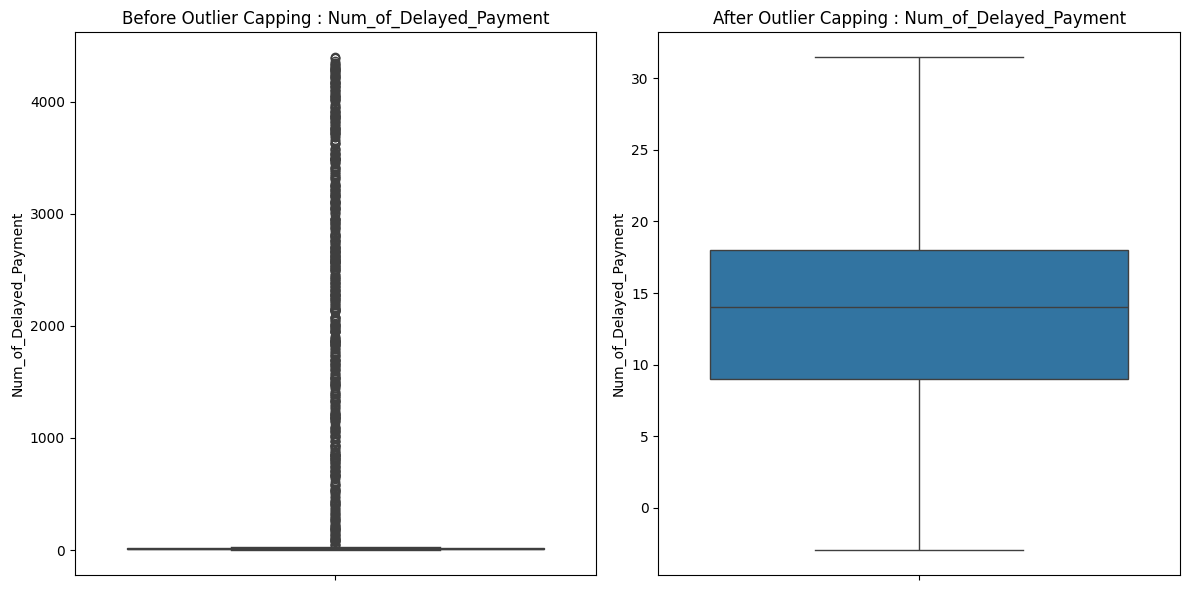

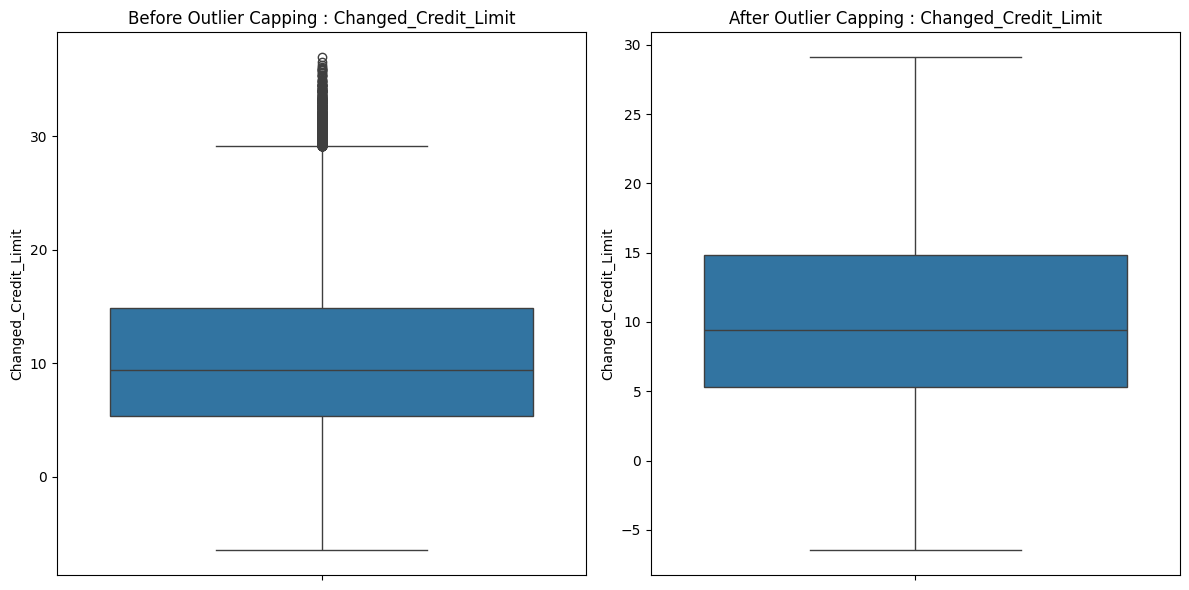

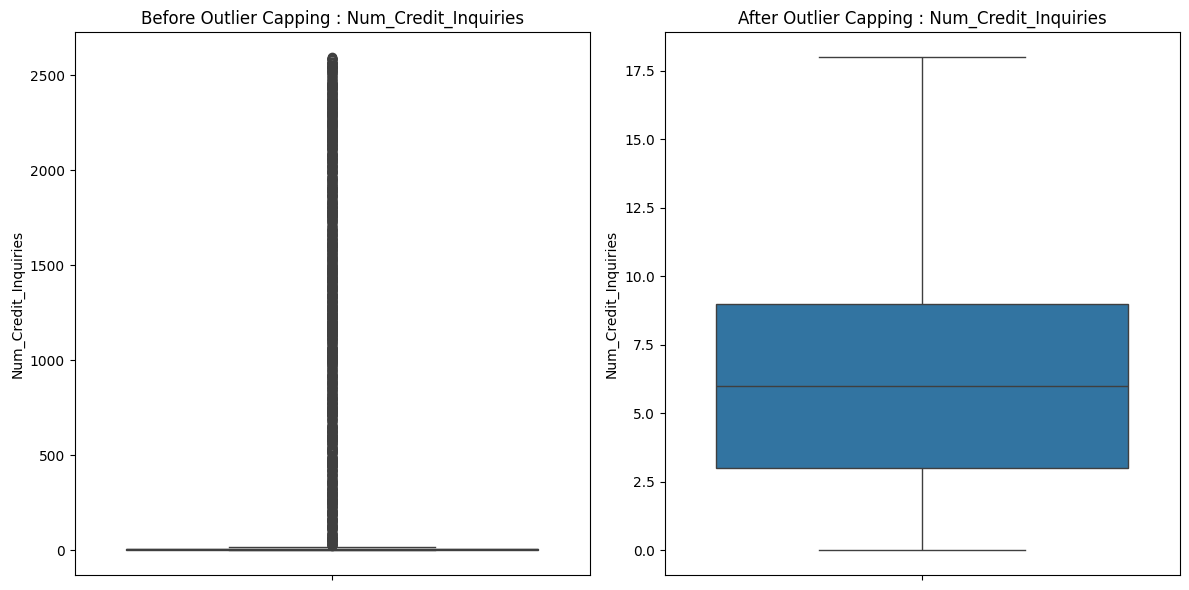

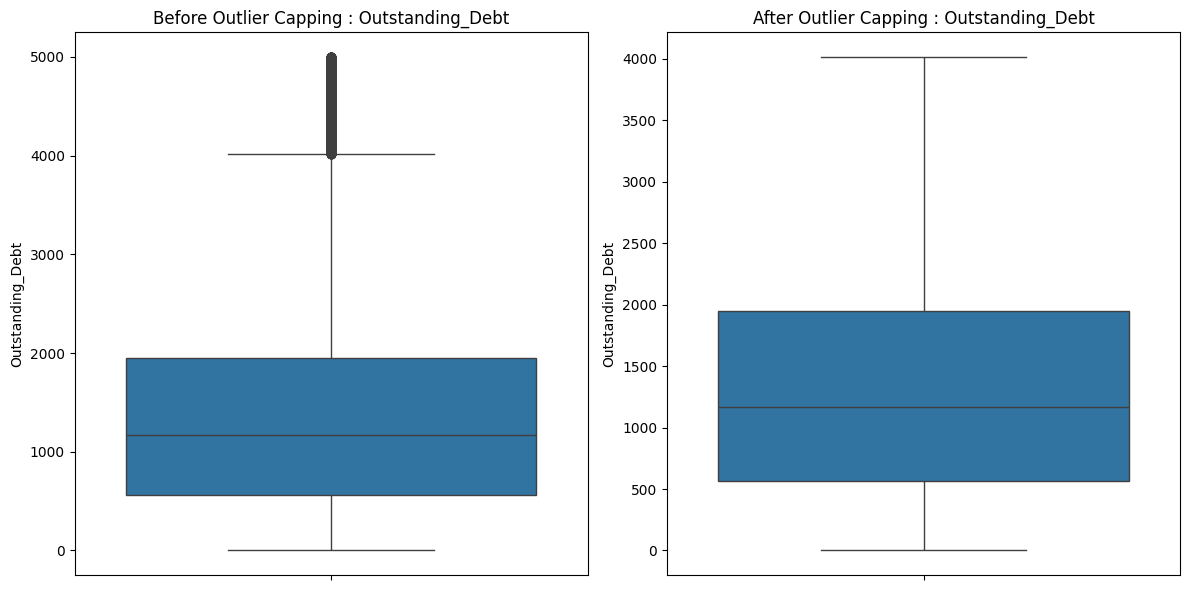

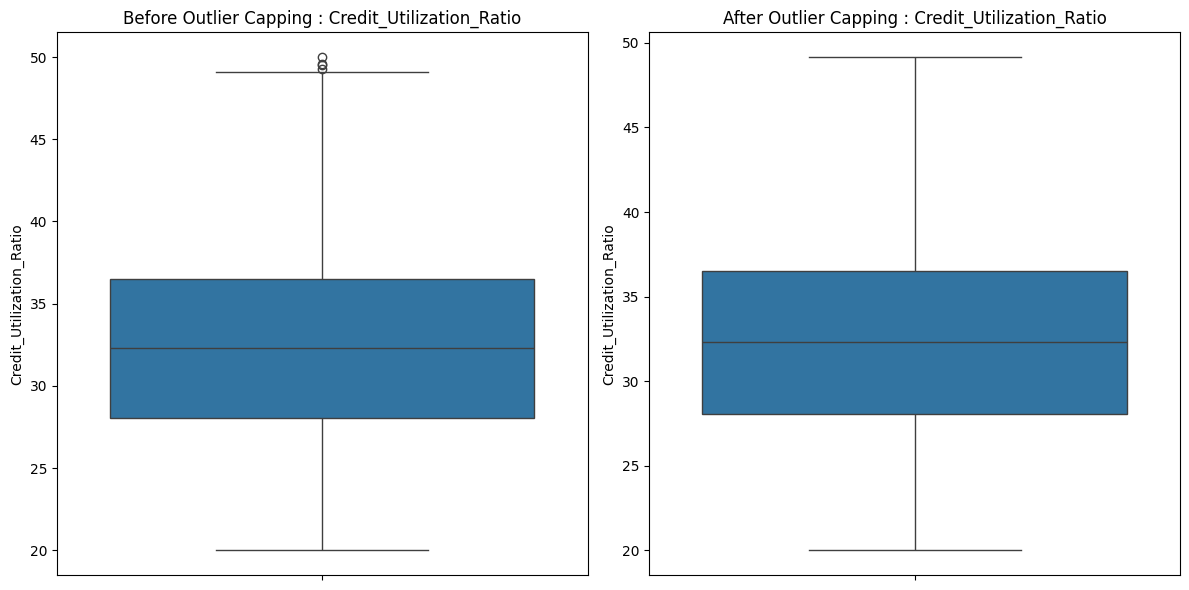

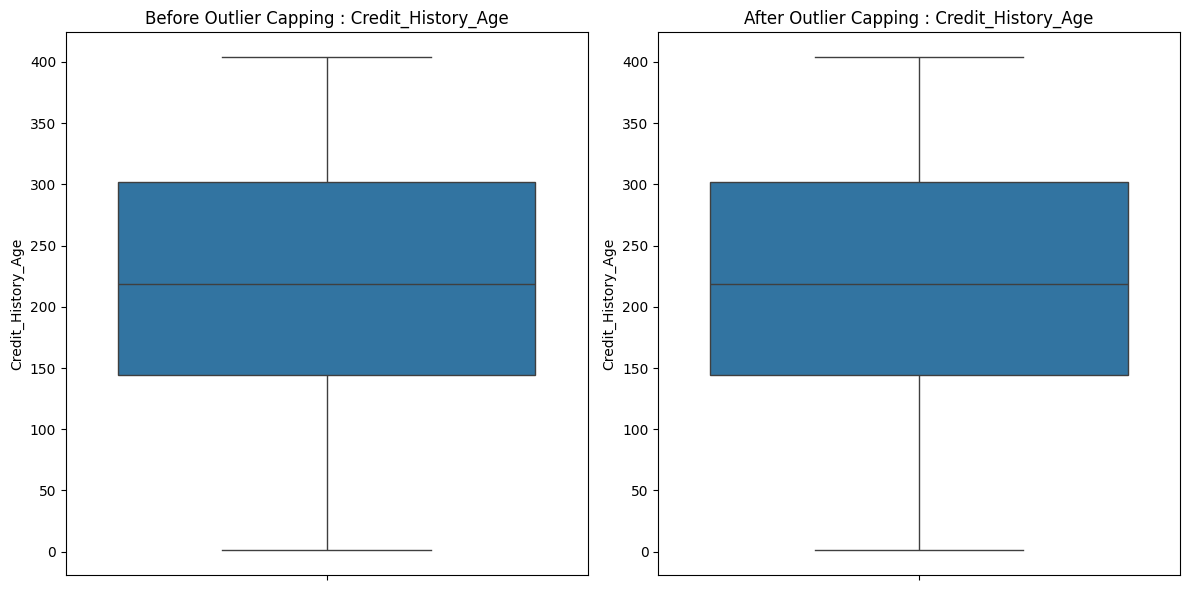

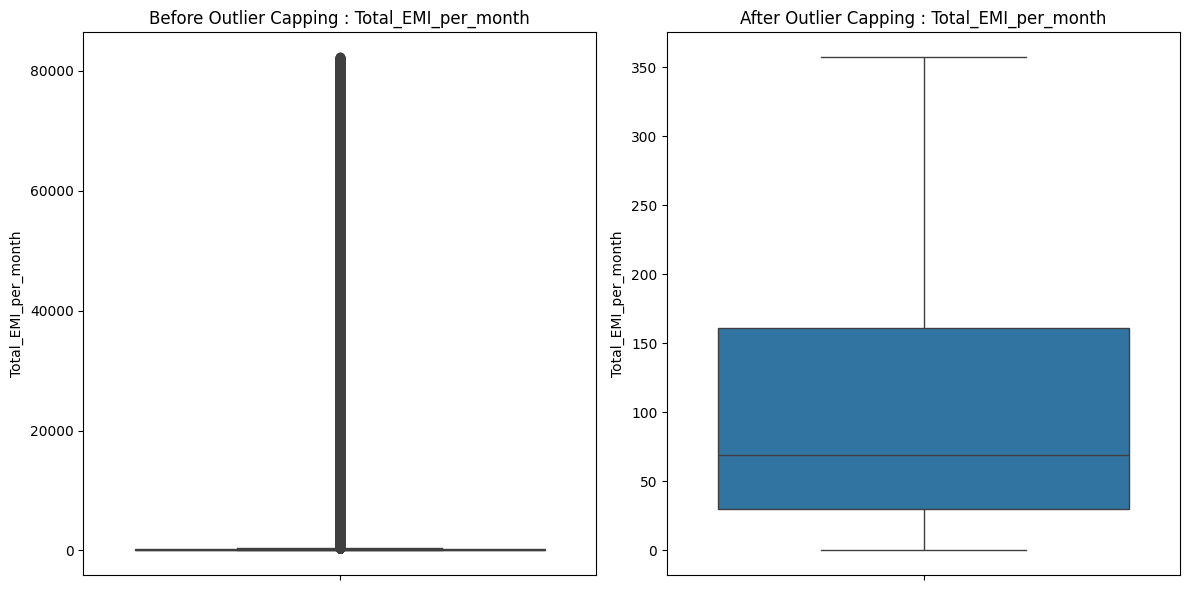

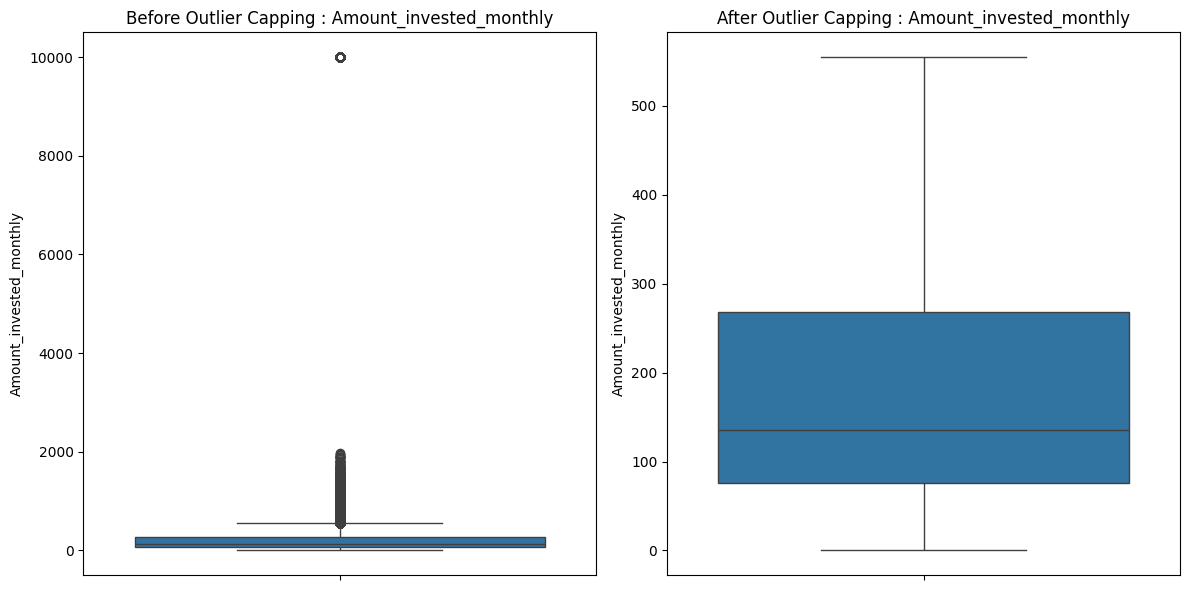

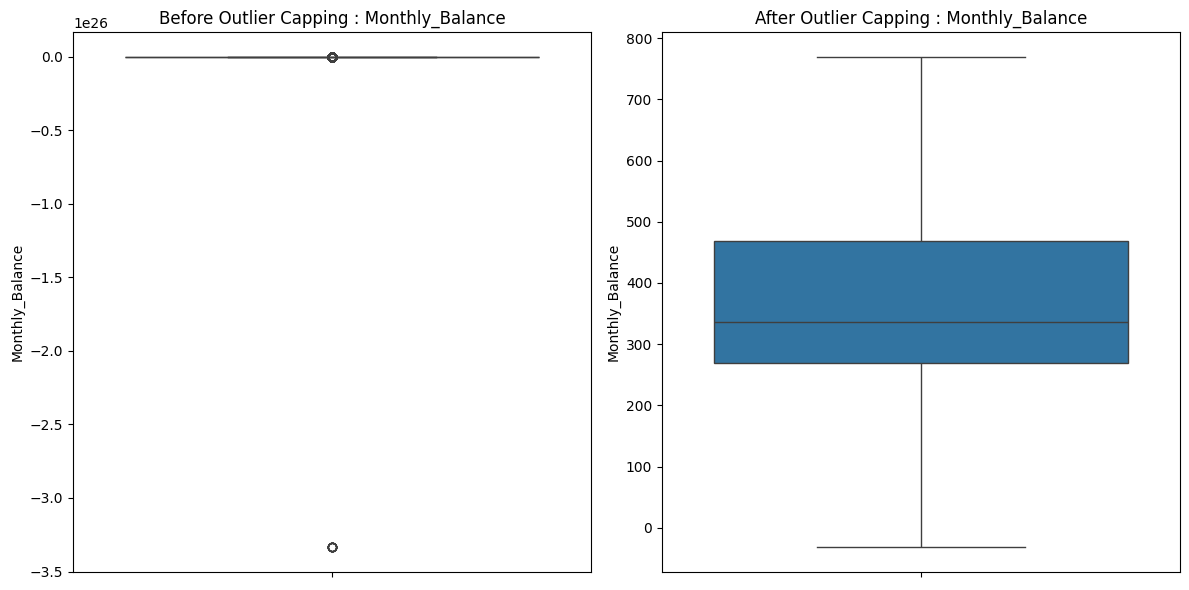

In [13]:
# comparing the columns with and without the outliers
def outlier_capping_comparison(data, data_processed, outlier_indices):
  for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
      plt.figure(figsize=(12, 6))

      # plotting the numerical columns from the original dataframe
      plt.subplot(1, 2, 1)
      sns.boxplot(data=data[column])
      plt.title(f'Before Outlier Capping : {column}')

      # plot distribution of the numerical columns where outliers are capped
      plt.subplot(1, 2, 2)
      sns.boxplot(data=data_processed[column])
      plt.title(f'After Outlier Capping : {column}')

      # showing output
      plt.tight_layout()
      plt.show()

# running the function to compare the numerical columns before and after outlier capping
outlier_capping_comparison(data = df, data_processed = df_clean, outlier_indices = outliers)

#Visualization

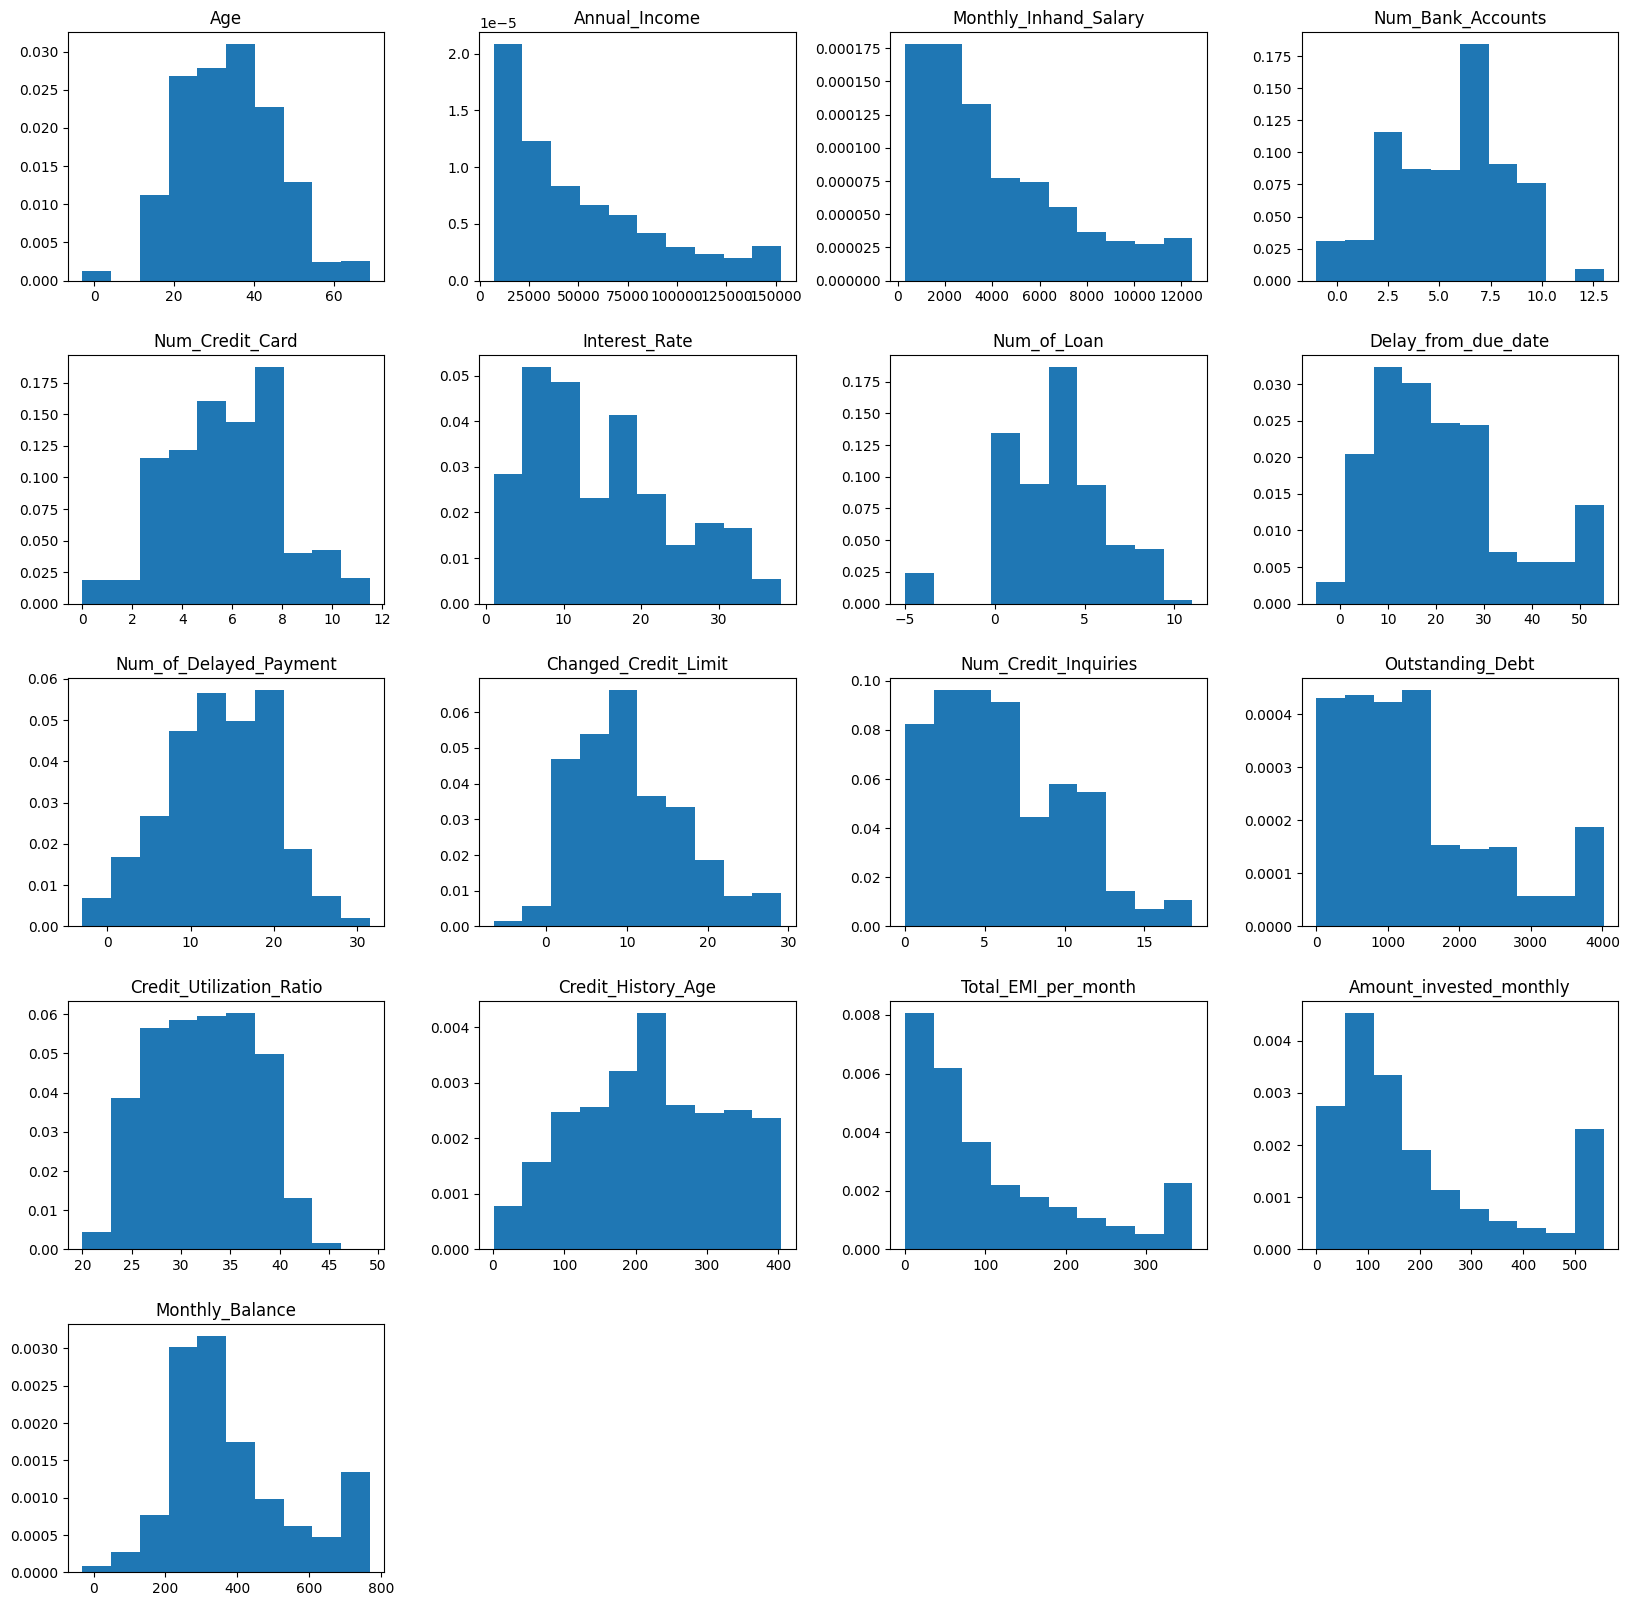

In [14]:
df_clean.hist(figsize=(20, 20), grid=False, density=True)
plt.show()

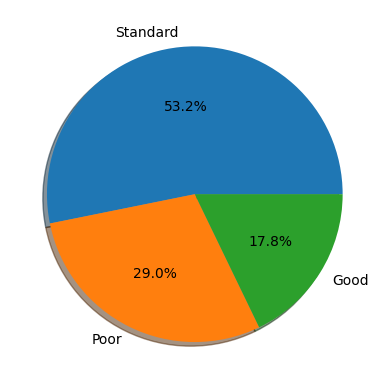

In [15]:
credit_socre_vals = df_clean.Credit_Score.value_counts().index
credit_socre_labels = df_clean.Credit_Score.value_counts().values

plt.pie(data = df_clean,
x = credit_socre_labels,
labels = credit_socre_vals,
autopct = '%1.1f%%',
shadow = True,
radius = 1)

plt.show()

#Encoding

In [16]:
df_clean['Month'] = pd.to_datetime(df_clean.Month, format='%B').dt.month

In [17]:
categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for column in categorical_cols:
  unique_values_count = len(df_clean[column].unique())
print(f"Number of unique values in the '{column}' column:", unique_values_count)

Number of unique values in the 'Payment_Behaviour' column: 6


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_clean['Type_of_Loan'] = label_encoder.fit_transform(df_clean['Type_of_Loan'])

In [19]:
# finding the unique values
print('Unique values in Payment_of_Min_Amount are: ', df_clean['Payment_of_Min_Amount'].unique())

Unique values in Payment_of_Min_Amount are:  ['No' 'NM' 'Yes']


In [20]:
# setting values
target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}

# mapping values
df_clean['Payment_of_Min_Amount'] = df_clean['Payment_of_Min_Amount'].map(target_mapping)

In [21]:
# mentioning the categorical columns where one-hot encoding needs to be performed
columns_to_encode = ['Occupation', 'Credit_Mix', 'Payment_Behaviour']

# creating dummy variables
df_dummy = pd.get_dummies(df_clean[columns_to_encode])

# concatenating the dummy variables with the original dataframe
df_processed = pd.concat([df_clean, df_dummy], axis=1)

# dropping the original categorical columns for which dummy variables were created
df_processed.drop(columns_to_encode, axis=1, inplace=True)

In [22]:
target_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df_processed['Credit_Score'] = df_processed['Credit_Score'].map(target_mapping)

#Feature reduction

In [23]:
df_processed.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)

In [24]:
# importing key libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif

# extracting the predictor variables
X = df_processed.drop('Credit_Score', axis=1)

# extracting the target variable
y = df_processed['Credit_Score']

# Method 1: finding feature importance using Tree-Based method
rf_model = RandomForestClassifier()
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_
top_10_rf = X.columns[feature_importances.argsort()[-10:][::-1]]

# Method 2: using Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector.fit(X, y)
top_10_rfe = X.columns[rfe_selector.support_]

# Method 3: using Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
top_10_univariate = X.columns[selector.get_support()]

#The following are the top 10 variables from each method.

print("Top 10 variables from Tree-Based Method:", ', '.join(top_10_rf))
print("---------------------------------------------------------------------------------------------------------")
print("Top 10 variables from Method Recursive Feature Elimination:", ', '.join(top_10_rfe))
print("---------------------------------------------------------------------------------------------------------")
print("Top 10 variables from Univariate Feature Selection:", ', '.join(top_10_univariate))
imp_columns = list(set(top_10_rf.tolist() + top_10_rfe.tolist() + top_10_univariate.tolist()))
imp_columns

Top 10 variables from Tree-Based Method: Outstanding_Debt, Interest_Rate, Delay_from_due_date, Credit_History_Age, Changed_Credit_Limit, Credit_Mix_Good, Credit_Mix_Standard, Credit_Utilization_Ratio, Monthly_Balance, Num_Credit_Card
---------------------------------------------------------------------------------------------------------
Top 10 variables from Method Recursive Feature Elimination: Annual_Income, Monthly_Inhand_Salary, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Monthly_Balance, Credit_Mix_Standard
---------------------------------------------------------------------------------------------------------
Top 10 variables from Univariate Feature Selection: Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Payment_of_Min_Amount, Credit_Mix_Bad, Credit_Mix_Good, Credit_Mix_Standard


['Credit_Mix_Standard',
 'Credit_Utilization_Ratio',
 'Annual_Income',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Interest_Rate',
 'Credit_Mix_Good',
 'Num_of_Delayed_Payment',
 'Monthly_Inhand_Salary',
 'Num_Credit_Card',
 'Credit_Mix_Bad',
 'Payment_of_Min_Amount',
 'Changed_Credit_Limit',
 'Monthly_Balance',
 'Delay_from_due_date',
 'Credit_History_Age']

In [26]:
# extracting the selected independent features
X_selected = df_processed[imp_columns]

# creating correlation matrix
correlation_matrix = X_selected.corr()

# finding highly correlated feature pairs
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)

print("Highly correlated pairs of variables and their correlation values:\n")
checked_pairs = set() # To keep track of checked pairs
for col1 in X_selected.columns:
  for col2 in X_selected.columns:
    if col1 != col2 and (col1, col2) not in checked_pairs and (col2, col1) not in checked_pairs:
      if highly_correlated_pairs.loc[col1, col2]:
        correlation_value = correlation_matrix.loc[col1, col2]
        print(f"{col1} - {col2}: {correlation_value:.2f}")
        checked_pairs.add((col1, col2))

Highly correlated pairs of variables and their correlation values:

Annual_Income - Monthly_Inhand_Salary: 0.96
Outstanding_Debt - Credit_Mix_Bad: 0.77
Credit_Mix_Good - Payment_of_Min_Amount: -0.75


In [27]:
X_selected.drop(['Annual_Income', 'Credit_Mix_Good', 'Credit_Mix_Bad'], axis=1, inplace=True)

<ipython-input-27-0144b68be918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.drop(['Annual_Income', 'Credit_Mix_Good', 'Credit_Mix_Bad'], axis=1, inplace=True)


In [37]:
# importing library for calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for non-numeric columns
non_numeric_columns = X_selected.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print(f"Non-numeric columns detected: {non_numeric_columns}")
    # You might want to handle these columns appropriately here
else:
    # Check for missing or infinite values
    if X_selected.isnull().values.any():
        print("Missing values detected.")
        # Handle missing values here, e.g., by filling or dropping them
        X_selected = X_selected.fillna(X_selected.mean())  # Example: filling with column mean

    if np.isinf(X_selected.values).any():
        print("Infinite values detected.")
        # Handle infinite values here, e.g., by replacing them
        X_selected = X_selected.replace([np.inf, -np.inf], np.nan)
        X_selected = X_selected.fillna(X_selected.mean())

    # calculating vif of the selected features
    vif_df = pd.DataFrame()
    vif_df["Variable"] = X_selected.columns
    vif_df["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

    print("Variance Inflation Factors:")
    print(vif_df)

Non-numeric columns detected: Index(['Credit_Mix_Standard', 'Credit_Mix_Good', 'Credit_Mix_Bad'], dtype='object')


In [38]:
print('Number of selected columns are: ', len(X_selected.columns))

Number of selected columns are:  16


In [39]:
final_X_cols = X_selected.columns.tolist()
print("Final selected predictors are: ", ', '.join(final_X_cols))

Final selected predictors are:  Credit_Mix_Standard, Credit_Utilization_Ratio, Annual_Income, Num_Credit_Inquiries, Outstanding_Debt, Interest_Rate, Credit_Mix_Good, Num_of_Delayed_Payment, Monthly_Inhand_Salary, Num_Credit_Card, Credit_Mix_Bad, Payment_of_Min_Amount, Changed_Credit_Limit, Monthly_Balance, Delay_from_due_date, Credit_History_Age


In [40]:
df_final = df_processed[final_X_cols + ['Credit_Score']]

# Scaling data

In [41]:
# splitting the predictors and target
X = df_final.drop('Credit_Score',axis=1)
y = df_final['Credit_Score']

# normalizing data using min-max scaler
from sklearn.preprocessing import MinMaxScaler

# initializing min-max scaler
scaler = MinMaxScaler()

# fitting it onto the independent features
X = scaler.fit_transform(X)

In [42]:
# importing SMOTE library
from imblearn.over_sampling import SMOTE

# initializing SMOTE
smote = SMOTE()

# fitting SMOTE to the data
X_bal, y_bal = smote.fit_resample(X, y)

#Train-test split

In [43]:
# importing required library
from sklearn.model_selection import train_test_split

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.3, random_state=123, stratify = y_bal)

# finding number of rows and column of the train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111665, 16)
(47857, 16)
(111665,)
(47857,)


In [45]:
# importing libraries to create different types of machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# importing model evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# List of classifiers to test
classifiers = [
('Decision Tree', DecisionTreeClassifier()),
('Random Forest', RandomForestClassifier()),
('KNN', KNeighborsClassifier(n_neighbors=5)),
('Gaussion NB',GaussianNB())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
  # Perform cross-validation
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

  # Calculate average performance metrics
  avg_accuracy = scores.mean()
  avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
  avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

  # Print the performance metrics
  print(f'Classifier: {clf_name}')
  print(f'Average Accuracy: {avg_accuracy:.4f}')
  print(f'Average Precision: {avg_precision:.4f}')
  print(f'Average Recall: {avg_recall:.4f}')
  print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.7777
Average Precision: 0.7771
Average Recall: 0.7778
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8545
Average Precision: 0.8537
Average Recall: 0.8551
-----------------------
Classifier: KNN
Average Accuracy: 0.7938
Average Precision: 0.7959
Average Recall: 0.7938
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.6953
Average Precision: 0.6962
Average Recall: 0.6953
-----------------------


In [46]:
# initializing and fitting the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

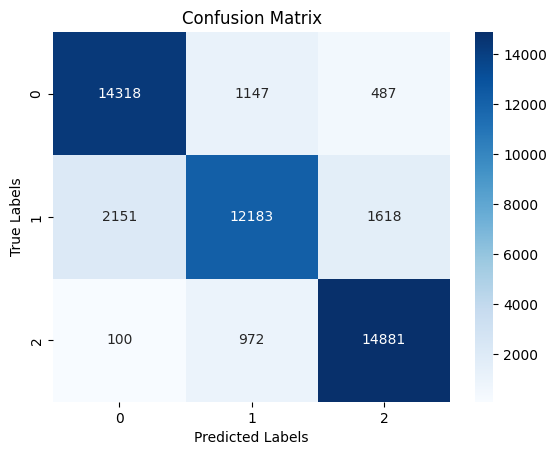

In [47]:
# making predictions on the test dataset
y_test_pred = rf_classifier.predict(X_test)

# evaluating model through a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [48]:
print("Classification Report")
print(classification_report(y_test, y_test_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.90      0.88     15952
           2       0.85      0.76      0.81     15952
           3       0.88      0.93      0.90     15953

    accuracy                           0.86     47857
   macro avg       0.86      0.86      0.86     47857
weighted avg       0.86      0.86      0.86     47857

